In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
random.seed(10) 
np.random.seed(0)
V = 4039
T = 1000*V
init_node_1 = np.random.randint(0,V)
init_node_2 = np.random.randint(0,V)

In [3]:
nodes = list(range(V)) # Get a list of only the node names
edges = np.loadtxt('facebook_combined.txt',dtype=int)

In [4]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.set_node_attributes(G, 0,'visits')

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


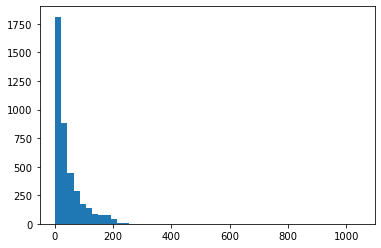

In [5]:
print(nx.info(G))
z = list(G.degree([n for n in G]))
y = [y[1] for y in z]
b = np.linspace(0,max(y))
plt.hist(y,bins=b)
plt.show()

In [6]:
H1 = G.copy()
H2 = G.copy()
Hv1 = G.copy()
Hv2 = G.copy()

In [7]:
pi = np.array([x[1] for x in list(G.degree())])
pi = pi/np.sum(pi)

In [8]:
t = 0
v1 = init_node_1
v2 = init_node_2
fv1 = np.empty(V)
fv2 = np.empty(V)
f1 = np.empty(V)
f2 = np.empty(V)
err_v1 = []
err_v2 = []
err_vm = []
err_1 = []
err_2 = []
err_m = []
explore = np.arange(1,T,T//(100*np.log(T))+1)
tracker = 0

print("Init Nodes - ",init_node_1,init_node_2)

while t < T:
    if t in explore:
        v_n1 = random.choice(list(H1.adj[v2]))
        v_n2 = random.choice(list(H2.adj[v1]))
        tracker = (tracker + 1)%2

    else:
        v_n1 = random.choice(list(H1.adj[v1]))
        v_n2 = random.choice(list(H2.adj[v2]))
        
    if tracker == 0:
        v_nv1 = v_n1
        v_nv2 = v_n2
    else:
        v_nv1 = v_n2
        v_nv2 = v_n1
            
    Hv1.nodes[v_nv1]['visits'] += 1
    Hv2.nodes[v_nv2]['visits'] += 1
    H1.nodes[v_n1]['visits'] += 1
    H2.nodes[v_n2]['visits'] += 1
    v1 = v_n1
    v2 = v_n2
    t += 1
    
    if t%(V//10) == 0:
        for i in range(V):
            fv1[i] = Hv1.nodes[i]['visits']
            fv2[i] = Hv2.nodes[i]['visits']
            f1[i] = H1.nodes[i]['visits']
            f2[i] = H2.nodes[i]['visits']
        pi_v1 = fv1/np.sum(fv1)
        pi_v2 = fv2/np.sum(fv2)
        pi_1 = f1/np.sum(f1)
        pi_2 = f2/np.sum(f2)
        
        err_v1.append(np.mean(abs(pi-pi_v1)))
        err_v2.append(np.mean(abs(pi-pi_v2)))
        err_vm.append(np.mean(abs(pi-(pi_v1+pi_v2)/2)))
        
        err_1.append(np.mean(abs(pi-pi_1)))
        err_2.append(np.mean(abs(pi-pi_2)))
        err_m.append(np.mean(abs(pi-(pi_1+pi_2)/2)))

Init Nodes -  2732 2607


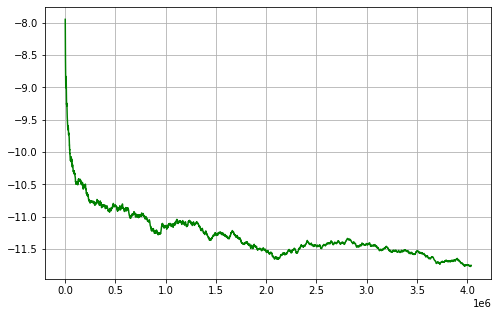

In [12]:
plt.figure(1,figsize=(8,5)) 
#plt.plot(np.array(list(range(len(err_v1))))*(V//10),np.log(err_1),color='blue')
#plt.plot(np.array(list(range(len(err_v1))))*(V//10),np.log(err_2),color='red')
plt.plot(np.array(list(range(len(err_v1))))*(V//10),np.log(err_m),color='green')

#plt.plot(np.array(list(range(len(err_v1))))*(V//10),np.log(err_v1),color='black')
#plt.plot(np.array(list(range(len(err_v1))))*(V//10),np.log(err_v2),color='black')
#plt.plot(np.array(list(range(len(err_v1))))*(V//10),np.log(err_vm),color='black')

plt.grid()

In [13]:
n_threads = len(explore)

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.set_node_attributes(G, [0]*n_threads,'visits')
H = G.copy()

In [ ]:
t = 0
init_nodes = np
fv1 = np.empty(V)
fv2 = np.empty(V)
f1 = np.empty(V)
f2 = np.empty(V)
err_v1 = []
err_v2 = []
err_vm = []
err_1 = []
err_2 = []
err_m = []
explore = np.arange(1,T,T//(100*np.log(T))+1)
tracker = 0

print("Init Nodes - ",init_node_1,init_node_2)

while t < T:
    if t in explore:
        v_n1 = random.choice(list(H1.adj[v2]))
        v_n2 = random.choice(list(H2.adj[v1]))
        tracker = (tracker + 1)%2

    else:
        v_n1 = random.choice(list(H1.adj[v1]))
        v_n2 = random.choice(list(H2.adj[v2]))
        
    if tracker == 0:
        v_nv1 = v_n1
        v_nv2 = v_n2
    else:
        v_nv1 = v_n2
        v_nv2 = v_n1
            
    Hv1.nodes[v_nv1]['visits'] += 1
    Hv2.nodes[v_nv2]['visits'] += 1
    H1.nodes[v_n1]['visits'] += 1
    H2.nodes[v_n2]['visits'] += 1
    v1 = v_n1
    v2 = v_n2
    t += 1
    
    if t%(V//10) == 0:
        for i in range(V):
            fv1[i] = Hv1.nodes[i]['visits']
            fv2[i] = Hv2.nodes[i]['visits']
            f1[i] = H1.nodes[i]['visits']
            f2[i] = H2.nodes[i]['visits']
        pi_v1 = fv1/np.sum(fv1)
        pi_v2 = fv2/np.sum(fv2)
        pi_1 = f1/np.sum(f1)
        pi_2 = f2/np.sum(f2)
        
        err_v1.append(np.mean(abs(pi-pi_v1)))
        err_v2.append(np.mean(abs(pi-pi_v2)))
        err_vm.append(np.mean(abs(pi-(pi_v1+pi_v2)/2)))
        
        err_1.append(np.mean(abs(pi-pi_1)))
        err_2.append(np.mean(abs(pi-pi_2)))
        err_m.append(np.mean(abs(pi-(pi_1+pi_2)/2)))